# GitHub analysis

In [11]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
from matplotlib import pyplot as plt

## Engagement numbers

In [4]:
stars_df = pd.read_csv("../data/analysis/stars.csv")
stars_df.head()

,Unnamed: 0,github_user_cleaned_url,date,user
0,0,JZhao12/CVML-Pose,NaN,NaN
1,1,CVML-UCLan/FCBFormer,2022-08-18 00:47:08,GitHub30
2,1,CVML-UCLan/FCBFormer,2022-09-02 00:39:35,zmw272415
3,1,CVML-UCLan/FCBFormer,2022-09-23 03:49:26,Earthnook
4,2,eprintsug/loginViaOrcid,NaN,NaN


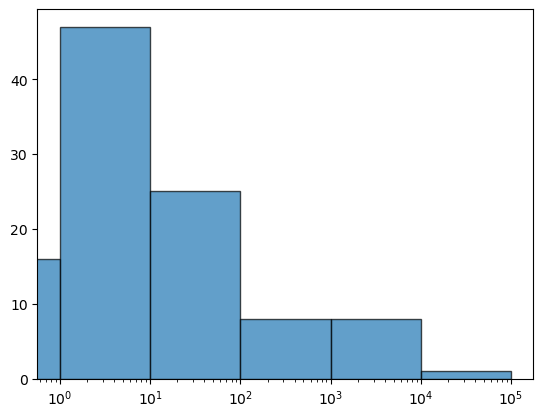

In [32]:
bins = np.hstack([0, 10**(np.arange(0,6))])
counts, bins, _ = plt.hist(stars_df.groupby("github_user_cleaned_url").count()["user"], bins=bins, ec="black", alpha=0.7)
plt.xscale('log')

In [33]:
print(counts)
print(bins)

[16. 47. 25.  8.  8.  1.]
[0.e+00 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05]


In [34]:
forks_df = pd.read_csv("../data/analysis/forks.csv")
forks_df.head()

,Unnamed: 0,github_user_cleaned_url,date,user
0,0,JZhao12/CVML-Pose,NaN,NaN
1,1,CVML-UCLan/FCBFormer,NaN,NaN
2,2,eprintsug/loginViaOrcid,NaN,NaN
3,3,eprintsug/orcidt2,2015-06-04 11:49:59,wfyson
4,4,alphapsa/PIPE,2021-03-10 08:49:05,bmorris3


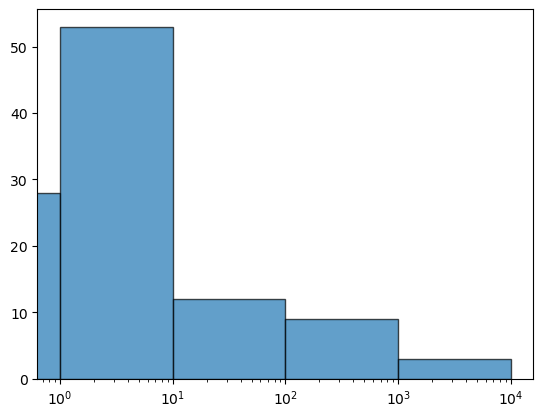

In [40]:
bins = np.hstack([0, 10**(np.arange(0,5))])
counts, bins, _ = plt.hist(forks_df.groupby("github_user_cleaned_url").count()["user"], bins = bins, ec="black", alpha=0.7)
plt.xscale('log')

In [60]:
fork_counts = forks_df.groupby("github_user_cleaned_url").count()
fork_counts.rename(columns={"user": "forks_no"}, inplace=True)
star_counts = stars_df.groupby("github_user_cleaned_url").count()
star_counts.rename(columns={"user": "stars_no"}, inplace=True)
engagement = pd.merge(left=fork_counts, right=star_counts, on="github_user_cleaned_url")
engagement.head()

,Unnamed: 0_x,date_x,forks_no,Unnamed: 0_y,date_y,stars_no
github_user_cleaned_url,,,,,,
52North/GEO-label-java,4,4,4,4,4,4
ADAC-UoN/PIMMS,1,1,1,1,0,0
AlexTS1980/COVID-Single-Shot-Model,1,0,0,3,3,3
AshwathyTR/IDN-Sum,1,1,1,1,1,1
BryanHunt/mongo-emf,7,7,7,38,38,38


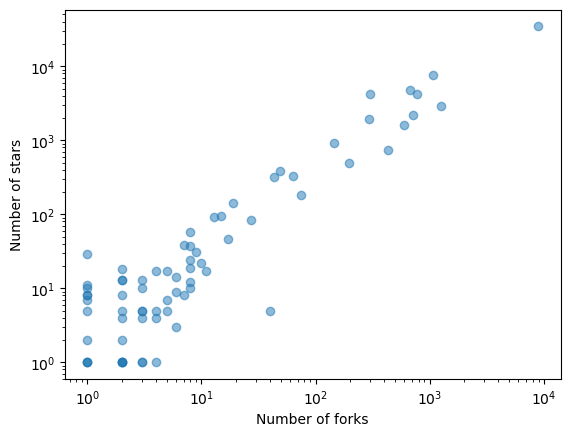

In [66]:
plt.scatter(engagement["forks_no"], engagement["stars_no"], alpha=0.5)
plt.xlabel("Number of forks")
plt.ylabel("Number of stars")
plt.xscale('log')
plt.yscale('log')

## Timelines

In [84]:
def plot_against_days_since_creation(df, column_name):
    """Plots number of markers set on all days since creation (total, one year, one month).

    Args:
        df (pd.DataFrame): input dataframe
        column_name (str): name of column with days since creation info
    """
    counted = df.groupby(column_name).count()
    fig = plt.figure(figsize=(20, 4))
    plt.subplot(131)
    plt.bar(counted.index, counted.github_user_cleaned_url)
    plt.xlabel("days since repository creation")
    plt.ylabel("number of stars on that day")
    plt.title("Complete timeline across all repositories")

    plt.subplot(132)
    plt.bar(counted.index[:365], counted.github_user_cleaned_url[:365])
    plt.xlabel("days since repository creation")
    plt.ylabel("number of stars on that day")
    plt.title("First year")

    plt.subplot(133)
    plt.bar(counted.index[:31], counted.github_user_cleaned_url[:31])
    plt.xlabel("days since repository creation")
    plt.ylabel("number of stars on that day")
    plt.title("First month")

    plt.show()

In [2]:
data_dir = "../data/analysis"

In [81]:
metadata = pd.read_csv(os.path.join(data_dir, "metadata.csv"), index_col=0)
metadata.created_at = pd.to_datetime(metadata.created_at)
stars = pd.read_csv(os.path.join(data_dir, "stars.csv"), index_col=0)
stars.date = pd.to_datetime(stars.date)

In [82]:
df = pd.merge(metadata, stars, on="github_user_cleaned_url")
df.dropna(subset=["date"], inplace=True)
df["starred_on_day_since_creation"] = (df.date - df.created_at).dt.days

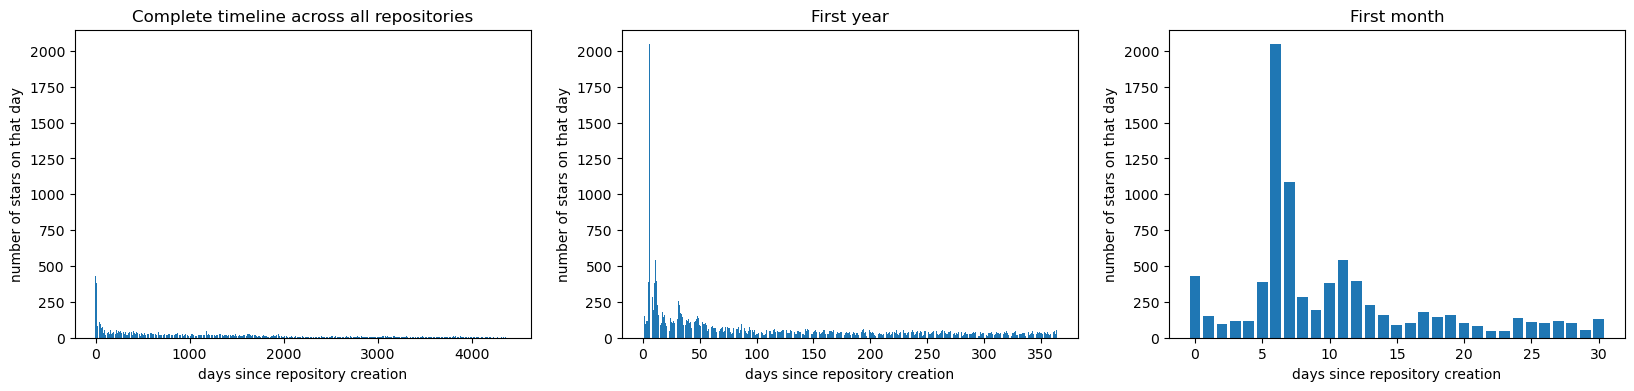

In [85]:
plot_against_days_since_creation(df, "starred_on_day_since_creation")

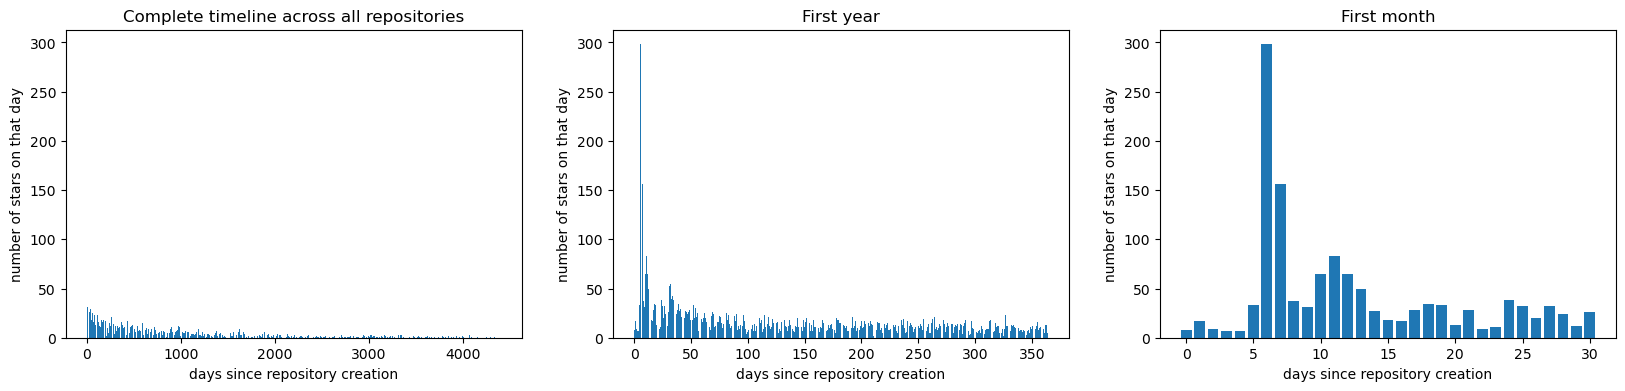

In [86]:
forks = pd.read_csv(os.path.join(data_dir, "forks.csv"), index_col=0)
forks.date = pd.to_datetime(forks.date)
df = pd.merge(metadata, forks, on="github_user_cleaned_url")
df.dropna(subset=["date"], inplace=True)
df["forked_on_day_since_creation"] = (df.date - df.created_at).dt.days
plot_against_days_since_creation(df, "forked_on_day_since_creation")